In [189]:
#import Libaries
import sklearn
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [190]:
#Read input dataset
data = pd.read_csv("weatherHistory.csv", delim_whitespace=False)

In [191]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [193]:
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [194]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## II. DATA CLEANING

In [195]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [196]:
# dropping unnecessary Columns. (which includes text.)
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [197]:
data.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,1015.13
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,1015.63
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,1015.94
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,1016.41
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,1016.51


In [198]:
# Converting Formatted Date from Object to DateTimeObject.
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors="ignore",utc=True)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Temperature (C)           96453 non-null  float64            
 2   Apparent Temperature (C)  96453 non-null  float64            
 3   Humidity                  96453 non-null  float64            
 4   Wind Speed (km/h)         96453 non-null  float64            
 5   Pressure (millibars)      96453 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 4.4 MB


In [200]:
# Indexing according to date and time.
idata = data.sort_values(by=['Formatted Date'])

In [201]:
# Setting Index
idata = idata.set_index('Formatted Date')
idata.index

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2016-12-31 13:00:00+00:00', '2016-12-31 14:00:00+00:00',
               '2016-12-31 15:00:00+00:00', '2016-12-31 16:00:00+00:00',
               '2016-12-31 17:00:00+00:00', '2016-12-31 18:00:00+00:00',
               '2016-12-31 19:00:00+00:00', '2016-12-31 20:00:00+00:00',
               '2016-12-31 21:00:00+00:00', '2016-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96453, freq=None)

In [202]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2016-12-31 13:00:00+00:00', '2016-12-31 14:00:00+00:00',
               '2016-12-31 15:00:00+00:00', '2016-12-31 16:00:00+00:00',
               '2016-12-31 17:00:00+00:00', '2016-12-31 18:00:00+00:00',
               '2016-12-31 19:00:00+00:00', '2016-12-31 20:00:00+00:00',
               '2016-12-31 21:00:00+00:00', '2016-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96429, freq=None)

In [203]:
# data after cleaning
idata.dropna()
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [204]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2005-12-31 23:00:00+00:00 to 2016-12-31 22:00:00+00:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Pressure (millibars)      96453 non-null  float64
dtypes: float64(5)
memory usage: 6.9 MB


## Correlation in data

In [205]:
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,-0.049263
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,1.000000


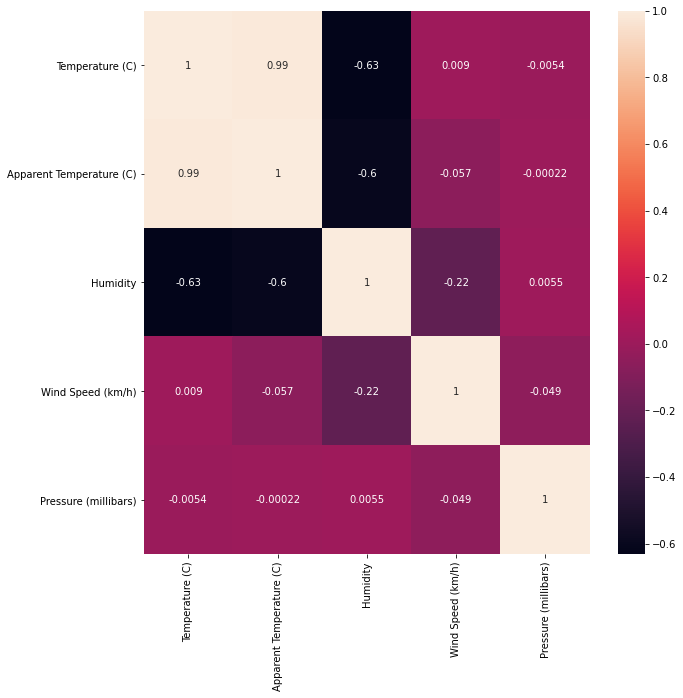

In [206]:
plt.figure(figsize  =(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

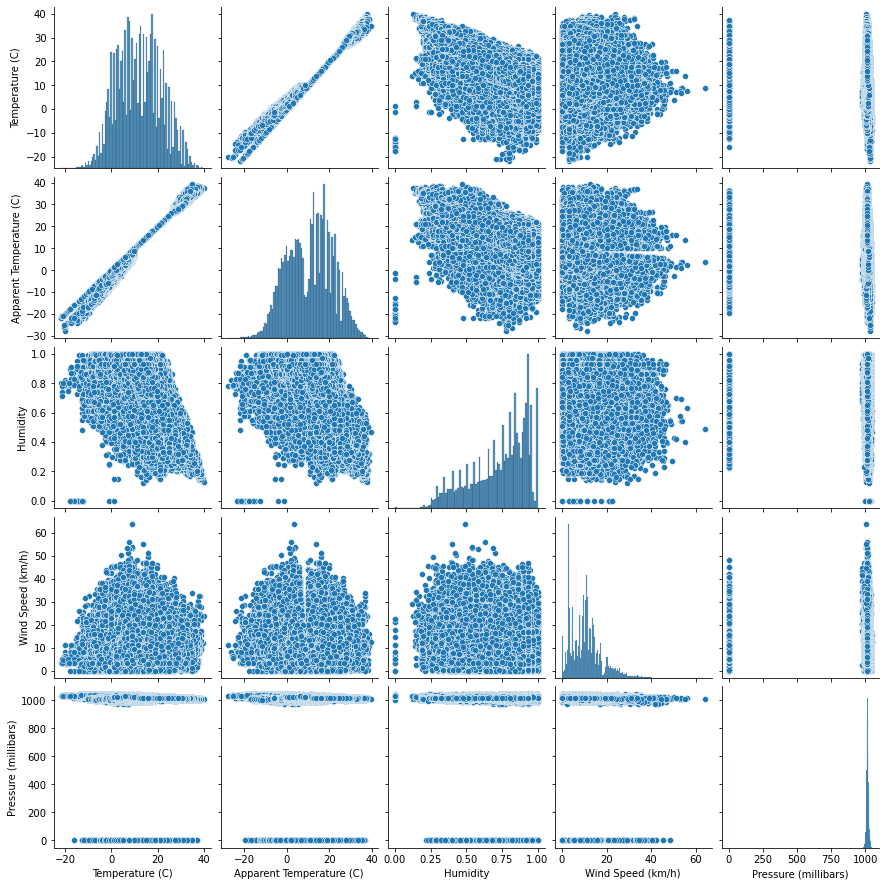

In [207]:
plt.figure(figsize  =(10,10))
sns.pairplot(data)
plt.show()

## Implement different regression models (Linear, multiple, Polynomial, SVR) to fit your data

In [208]:
#Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

##  we wil use only 'temperature' feature in our Mode

In [209]:
x=data['Temperature (C)']
y=data['Apparent Temperature (C)']
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)
#Applying Linear Regression Model 
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train.values.reshape(-1,1), y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train.values.reshape(-1,1), y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test.values.reshape(-1,1), y_test))
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test.values.reshape(-1,1))

Linear Regression Train Score is :  0.9852615796241125
Linear Regression Test Score is :  0.9855082992860318


In [210]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.9880465718354466
Mean Squared Error Value is :  1.6719380614699308
Median Squared Error Value is :  0.76898955273189


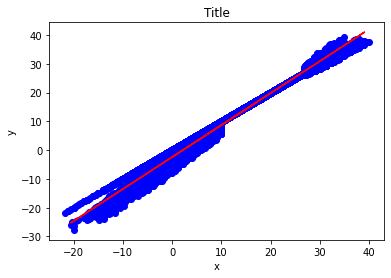

In [211]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'blue') 
plt.plot(X_test,y_pred, color = 'red') 
plt.title('Title') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

In [212]:
print('model intercept: ',LinearRegressionModel.intercept_)
print('model coefficient: ',LinearRegressionModel.coef_)

model intercept:  -2.4116092274516063
model coefficient:  [1.11186967]


## Using OLS

In [213]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.983
Model:                                  OLS   Adj. R-squared (uncentered):              0.983
Method:                       Least Squares   F-statistic:                          4.446e+06
Date:                      Tue, 17 Aug 2021   Prob (F-statistic):                        0.00
Time:                              15:46:10   Log-Likelihood:                     -1.6252e+05
No. Observations:                     77162   AIC:                                  3.250e+05
Df Residuals:                         77161   BIC:                                  3.251e+05
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                      coef    std err          t      P>|t| 

## We wilI use only Humidity feature in our Mode

In [214]:
x=data['Humidity']
y=data['Apparent Temperature (C)']
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)
#Applying Linear Regression Model 
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train.values.reshape(-1,1), y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train.values.reshape(-1,1), y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test.values.reshape(-1,1), y_test))
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test.values.reshape(-1,1))

Linear Regression Train Score is :  0.3605919016900895
Linear Regression Test Score is :  0.3729099806016034


In [215]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  6.960464312147415
Mean Squared Error Value is :  72.34869751274366
Median Squared Error Value is :  6.250440324215161


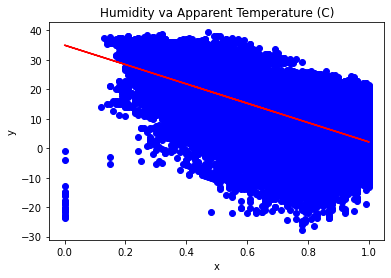

In [216]:
plt.scatter(x, y, color = 'blue') 
plt.plot(X_test,y_pred, color = 'red') 
plt.title('Humidity va Apparent Temperature (C)') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

In [217]:
print('model intercept: ',LinearRegressionModel.intercept_)
print('model coefficient: ',LinearRegressionModel.coef_)

model intercept:  34.955439843157464
model coefficient:  [-32.82540443]


## Using OLS

In [218]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.336
Model:                                  OLS   Adj. R-squared (uncentered):              0.336
Method:                       Least Squares   F-statistic:                          3.909e+04
Date:                      Tue, 17 Aug 2021   Prob (F-statistic):                        0.00
Time:                              15:46:10   Log-Likelihood:                     -3.0377e+05
No. Observations:                     77162   AIC:                                  6.075e+05
Df Residuals:                         77161   BIC:                                  6.076e+05
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                 coef    std err          t      P>|t|      

## We will use only Wind Speed (km/h) feature in our Mode

In [219]:
x=data['Wind Speed (km/h)']
y=data['Apparent Temperature (C)']
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)
#Applying Linear Regression Model 
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train.values.reshape(-1,1), y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train.values.reshape(-1,1), y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test.values.reshape(-1,1), y_test))
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test.values.reshape(-1,1))

Linear Regression Train Score is :  0.003325866696819002
Linear Regression Test Score is :  0.0027085596922807875


In [220]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  9.03998204734762
Mean Squared Error Value is :  115.05961586837545
Median Squared Error Value is :  8.254784651352534


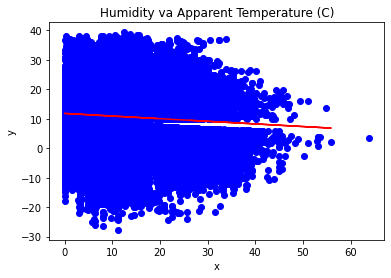

In [221]:
plt.scatter(x, y, color = 'blue') 
plt.plot(X_test,y_pred, color = 'red') 
plt.title('Humidity va Apparent Temperature (C)') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

In [222]:
print('model intercept: ',LinearRegressionModel.intercept_)
print('model coefficient: ',LinearRegressionModel.coef_)

model intercept:  11.806230438952316
model coefficient:  [-0.08905119]


## Using OLS

In [223]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.334
Model:                                  OLS   Adj. R-squared (uncentered):              0.334
Method:                       Least Squares   F-statistic:                          3.877e+04
Date:                      Tue, 17 Aug 2021   Prob (F-statistic):                        0.00
Time:                              15:46:11   Log-Likelihood:                     -3.0388e+05
No. Observations:                     77162   AIC:                                  6.078e+05
Df Residuals:                         77161   BIC:                                  6.078e+05
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                        coef    std err          t      P>|t

## (2) multivariate Regression

### There I will select the two predictor variables: Temperature and humidity in the Model

In [224]:
x=data[['Temperature (C)','Humidity']]
y=data['Apparent Temperature (C)']
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)
#Applying Linear Regression Model 
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)

Linear Regression Train Score is :  0.9863000717514205
Linear Regression Test Score is :  0.9865697011489974


In [225]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.9385581628472724
Mean Squared Error Value is :  1.5494818909876877
Median Squared Error Value is :  0.721428672521041


In [226]:
print('model intercept: ',LinearRegressionModel.intercept_)
print('model coefficient: ',LinearRegressionModel.coef_)

model intercept:  -4.427456927197332
model coefficient:  [1.14116691 2.26876154]


## Using OLS

In [227]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.991
Model:                                  OLS   Adj. R-squared (uncentered):              0.991
Method:                       Least Squares   F-statistic:                          4.226e+06
Date:                      Tue, 17 Aug 2021   Prob (F-statistic):                        0.00
Time:                              15:46:11   Log-Likelihood:                     -1.3805e+05
No. Observations:                     77162   AIC:                                  2.761e+05
Df Residuals:                         77160   BIC:                                  2.761e+05
Df Model:                                 2                                                  
Covariance Type:                  nonrobust                                                  
                      coef    std err          t      P>|t| 

## Let's Try Regression with all features

In [228]:
x=data[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y=data['Apparent Temperature (C)']
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)
#Applying Linear Regression Model 
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)

Linear Regression Train Score is :  0.9897826355268496
Linear Regression Test Score is :  0.9899538535228078


In [229]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.8486124845401858
Mean Squared Error Value is :  1.159045097455671
Median Squared Error Value is :  0.7013332745208452


In [230]:
print('model intercept: ',LinearRegressionModel.intercept_)
print('model coefficient: ',LinearRegressionModel.coef_)

model intercept:  -2.518474690774905
model coefficient:  [ 1.12594404e+00  1.04591733e+00 -9.47752225e-02  1.96296924e-04]


## Using OLS

In [231]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.995
Model:                                  OLS   Adj. R-squared (uncentered):              0.995
Method:                       Least Squares   F-statistic:                          3.651e+06
Date:                      Tue, 17 Aug 2021   Prob (F-statistic):                        0.00
Time:                              15:46:11   Log-Likelihood:                     -1.1710e+05
No. Observations:                     77162   AIC:                                  2.342e+05
Df Residuals:                         77158   BIC:                                  2.342e+05
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
                           coef    std err          t      P

# (3) polynomial regression:
## Temperature (C) and  log('Pressure (millibars)')

In [232]:
X=data[['Temperature (C)','Pressure (millibars)']].copy()
X['Pressure (millibars)']=np.log1p(X['Pressure (millibars)'])
y=data['Apparent Temperature (C)']
X_train, X_validate, y_train, y_validate = train_test_split( X,y, test_size=0.3, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_validate)
print('r2 score: ',r2_score(y_validate,y_predict))

r2 score:  0.9854042786144055


In [233]:
print('model intercept: ',model.intercept_)
print('model coefficient: ',model.coef_)

model intercept:  -2.787618637754669
model coefficient:  [1.1110218  0.05672762]


## Using OLS

In [234]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.992
Model:                                  OLS   Adj. R-squared (uncentered):              0.992
Method:                       Least Squares   F-statistic:                          4.372e+06
Date:                      Tue, 17 Aug 2021   Prob (F-statistic):                        0.00
Time:                              15:46:11   Log-Likelihood:                     -1.1536e+05
No. Observations:                     67517   AIC:                                  2.307e+05
Df Residuals:                         67515   BIC:                                  2.307e+05
Df Model:                                 2                                                  
Covariance Type:                  nonrobust                                                  
                           coef    std err          t      P

# Let's Try polynomial regression using all features with log pressure

In [235]:
X=data[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X['Pressure (millibars)']=np.log1p(X['Pressure (millibars)'])
y=data['Apparent Temperature (C)']
X_train, X_validate, y_train, y_validate = train_test_split( X,y, test_size=0.3, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_validate)
print('r2 score: ',r2_score(y_validate,y_predict))

r2 score:  0.9898530879497243


In [236]:
print('model intercept: ',model.intercept_)
print('model coefficient: ',model.coef_)

model intercept:  -2.4674103187216208
model coefficient:  [ 1.12513143  1.0336538  -0.09515221  0.02459732]


## Using OLS

In [237]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.995
Model:                                  OLS   Adj. R-squared (uncentered):              0.995
Method:                       Least Squares   F-statistic:                          3.216e+06
Date:                      Tue, 17 Aug 2021   Prob (F-statistic):                        0.00
Time:                              15:46:11   Log-Likelihood:                     -1.0241e+05
No. Observations:                     67517   AIC:                                  2.048e+05
Df Residuals:                         67513   BIC:                                  2.049e+05
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
                           coef    std err          t      P